# Import Library

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# Generate Sin(x) Dataset

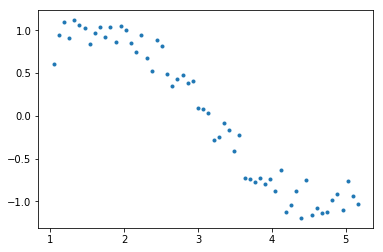

In [2]:
# define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(100)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))

data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

# Generate New Features with higher power 

In [3]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,0.603561,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,0.950196,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,1.100139,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.913191,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.117494,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


# 0. Function definition

In [4]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [5]:
def example_regression(data, power, plot_dict, reg_type, alpha, var):
    # define estimator object
    type_dict = {'Linear':LinearRegression(normalize=True),
                 'Lasso':Lasso(alpha = alpha, normalize=True),
                 'Ridge':Ridge(alpha = alpha, normalize=True)}
    if var == 'power':
        # generate X in order
        X = ['x']
        if power >=2:
            X.extend(['x_%d'%i for i in range(2,power+1)])

        # fit the model
        if reg_type in type_dict:
            model = type_dict[reg_type]
        model.fit(data[X],data['y'])
        y_pred = model.predict(data[X])

        # check if a plot is to be made for the entered power
        if power in plot_dict:
            plt.subplot(plot_dict[power])
            plt.tight_layout()
            plt.plot(data['x'],data['y'],'.')
            plt.plot(data['x'],y_pred)
            plt.title('Plot for power: %d'%power)

        # return the result in pre-defined format
        rss = sum((y_pred-data['y'])**2)
        ret = [rss]
        ret.extend([model.intercept_])
        ret.extend(model.coef_)
    elif var == 'alpha':
        # generate X in order
        X = ['x']
        if power >=2:
            X.extend(['x_%d'%i for i in range(2,power+1)])

        # fit the model
        if reg_type in type_dict:
            model = type_dict[reg_type]
        model.fit(data[X],data['y'])
        y_pred = model.predict(data[X])

        # check if a plot is to be made for the entered power
        if alpha in plot_dict:
            plt.subplot(plot_dict[alpha])
            plt.tight_layout()
            plt.plot(data['x'],data['y'],'.')
            plt.plot(data['x'],y_pred)
            plt.title('Plot for alpha: %.3f'%alpha)

        # return the result in pre-defined format
        rss = sum((y_pred-data['y'])**2)
        ret = [rss]
        ret.extend([model.intercept_])
        ret.extend(model.coef_)    
    return ret

# Lasso Regularization with Varied power

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


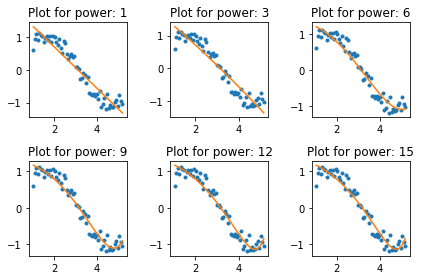

In [6]:
# initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['power_%d'%i for i in range(1,16)]

perf_Lasso = pd.DataFrame(index=ind, columns=col)

# define the powers for which a plot is required: {power:where}
plot_dict = {1:231,3:232,6:233,9:234,12:235,15:236}

# iterate through all powers and assimilate results
for i in range(1,16):
    perf_Lasso.iloc[i-1,0:i+2] = example_regression(data, power=i, plot_dict=plot_dict,reg_type='Lasso', alpha = 1e-3, var='power')

In [7]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
power_1,3.7,2,-0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_2,3.7,1.9,-0.54,-0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_3,3.7,1.9,-0.54,-0.016,-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_4,3.1,1.5,-0.2,-0.11,-0,0.0015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_5,2.4,1.4,-0,-0.15,-0,0,0.00042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_6,2.2,1.4,-0,-0.15,-0,-0,0,7.8e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_7,2,1.3,-0,-0.13,-0.0025,-0,-0,0,1.6e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_8,1.9,1.3,-0,-0.12,-0.0043,-0,-0,0,0,3.1e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_9,1.8,1.3,-0,-0.12,-0.0044,-0,-0,0,0,0,5.9e-07,NaN,NaN,NaN,NaN,NaN,NaN
power_10,1.9,1.3,-0,-0.12,-0.0025,-0,-0,0,0,0,0,1.1e-07,NaN,NaN,NaN,NaN,NaN


# Lasso Regularization with Varied Alpha

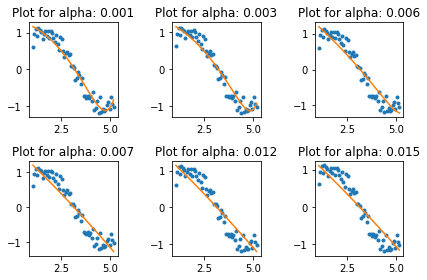

In [8]:
# initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%de-3'%i for i in range(1,16)]

perf_Lasso = pd.DataFrame(index=ind, columns=col)

# define the alpha for which a plot is required: {alpha:where}
plot_dict = {1e-3:231,3e-3:232,6e-3:233,7e-3:234,12e-3:235,15e-3:236} #key值為alpha的值

# iterate through all powers and assimilate results
for i in range(1,16):
    perf_Lasso.iloc[i-1,0:18] = example_regression(data, power=15, plot_dict=plot_dict,reg_type='Lasso', alpha = i*1e-3, var = 'alpha')

In [9]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-3,1.9,1.3,-0,-0.13,-0,-0,-0,0,0,0,0,0,6.3e-09,2.5e-09,0,0,0
alpha_2e-3,2,1.3,-0,-0.12,-0,-0,-0,0,0,0,0,0,0,0,4.1e-10,4.1e-11,0
alpha_3e-3,2.3,1.4,-0.12,-0.097,-0,-0,-0,0,0,0,0,0,0,0,0,0,1.8e-11
alpha_4e-3,2.6,1.5,-0.22,-0.075,-0,-0,-0,0,0,0,0,0,0,0,0,0,1.3e-11
alpha_5e-3,3,1.6,-0.33,-0.053,-0,-0,-0,-0,0,0,0,0,0,0,0,0,8.5e-12
alpha_6e-3,3.4,1.7,-0.43,-0.031,-0,-0,-0,-0,0,0,0,0,0,0,0,0,3.8e-12
alpha_7e-3,3.9,1.8,-0.52,-0.013,-0,-0,-0,-0,0,0,0,0,0,0,0,0,0
alpha_8e-3,3.9,1.7,-0.51,-0.013,-0,-0,-0,-0,-0,0,0,0,0,0,0,0,0
alpha_9e-3,4,1.7,-0.51,-0.012,-0,-0,-0,-0,-0,0,0,0,0,0,0,0,0
alpha_10e-3,4,1.7,-0.51,-0.012,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0,0


# Ridge Regularization with Varied power

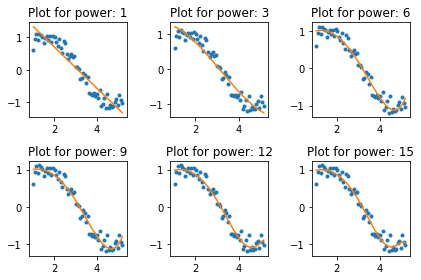

In [10]:
# initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['power_%d'%i for i in range(1,16)]

perf_Ridge = pd.DataFrame(index=ind, columns=col)

# define the powers for which a plot is required: {power:where}
plot_dict = {1:231,3:232,6:233,9:234,12:235,15:236}

# iterate through all powers and assimilate results
for i in range(1,16):
    perf_Ridge.iloc[i-1,0:i+2] = example_regression(data, power=i, plot_dict=plot_dict,reg_type='Ridge', alpha = 1e-3, var='power')

In [11]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
power_1,3.7,2,-0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_2,3.7,1.8,-0.53,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_3,2.7,1.3,0.24,-0.31,0.032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_4,1.6,0.71,0.68,-0.28,-0.03,0.0091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_5,1.3,0.61,0.63,-0.19,-0.034,-0.00049,0.0015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_6,1.3,0.68,0.5,-0.15,-0.028,-0.002,0.0004,0.00019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_7,1.3,0.73,0.44,-0.14,-0.025,-0.0018,0.00022,0.0001,1.8e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_8,1.3,0.74,0.43,-0.14,-0.024,-0.0018,0.00022,9.9e-05,1.7e-05,3.3e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_9,1.3,0.72,0.45,-0.14,-0.025,-0.002,0.00019,0.0001,2.1e-05,2e-06,-4.2e-07,NaN,NaN,NaN,NaN,NaN,NaN
power_10,1.2,0.69,0.47,-0.13,-0.026,-0.0024,0.00012,0.0001,2.4e-05,3.6e-06,1.3e-07,-1.4e-07,NaN,NaN,NaN,NaN,NaN


# Ridge Regularization with Varied Alpha¶

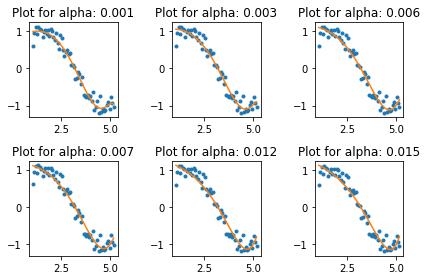

In [12]:
# initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%de-3'%i for i in range(1,16)]

perf_Ridge = pd.DataFrame(index=ind, columns=col)

# define the alpha for which a plot is required: {power:where}
plot_dict = {1e-3:231,3e-3:232,6e-3:233,7e-3:234,12e-3:235,15e-3:236} #key值為alpha的值
# iterate through all alphas and assimilate results
for i in range(1,16):
    perf_Ridge.iloc[i-1,0:18] = example_regression(data, power=15, plot_dict=plot_dict,reg_type='Ridge', alpha = i*1e-3, var = 'alpha')

In [13]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-3,1.1,0.69,0.43,-0.11,-0.024,-0.0029,-0.00015,3.6e-05,1.5e-05,3.6e-06,6.9e-07,1.1e-07,1.4e-08,8.6e-10,-2.3e-10,-1.3e-10,-4e-11
alpha_2e-3,1.2,0.86,0.27,-0.088,-0.02,-0.0026,-0.00018,2.1e-05,1.2e-05,3e-06,6.1e-07,1e-07,1.4e-08,1.2e-09,-1.4e-10,-1.1e-10,-3.7e-11
alpha_3e-3,1.3,0.97,0.18,-0.078,-0.017,-0.0023,-0.00018,1.4e-05,9.6e-06,2.6e-06,5.4e-07,9.4e-08,1.3e-08,1.2e-09,-8.4e-11,-8.7e-11,-3.2e-11
alpha_4e-3,1.4,1,0.12,-0.072,-0.016,-0.0021,-0.00017,1e-05,8.2e-06,2.3e-06,4.8e-07,8.5e-08,1.2e-08,1.2e-09,-4.8e-11,-7.3e-11,-2.8e-11
alpha_5e-3,1.4,1.1,0.07,-0.067,-0.014,-0.002,-0.00016,7.5e-06,7.1e-06,2e-06,4.3e-07,7.7e-08,1.2e-08,1.2e-09,-2.2e-11,-6.1e-11,-2.4e-11
alpha_6e-3,1.5,1.2,0.032,-0.064,-0.013,-0.0018,-0.00016,5.5e-06,6.3e-06,1.8e-06,3.9e-07,7.1e-08,1.1e-08,1.2e-09,-1e-12,-5.2e-11,-2.1e-11
alpha_7e-3,1.5,1.2,0.0019,-0.061,-0.013,-0.0017,-0.00015,3.9e-06,5.6e-06,1.7e-06,3.6e-07,6.6e-08,1e-08,1.1e-09,1.6e-11,-4.4e-11,-1.9e-11
alpha_8e-3,1.6,1.2,-0.023,-0.058,-0.012,-0.0017,-0.00015,2.6e-06,5.1e-06,1.5e-06,3.4e-07,6.2e-08,9.6e-09,1.1e-09,2.9e-11,-3.7e-11,-1.6e-11
alpha_9e-3,1.6,1.2,-0.044,-0.057,-0.011,-0.0016,-0.00014,1.5e-06,4.6e-06,1.4e-06,3.1e-07,5.8e-08,9.2e-09,1.1e-09,4.1e-11,-3.2e-11,-1.5e-11
alpha_10e-3,1.6,1.3,-0.061,-0.055,-0.011,-0.0015,-0.00014,6.4e-07,4.2e-06,1.3e-06,2.9e-07,5.5e-08,8.8e-09,1.1e-09,5e-11,-2.7e-11,-1.3e-11
